In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
df = pd.read_csv (r'year_co2_temp.csv')
tf.config.list_physical_devices()

Init Plugin
Init Graph Optimizer
Init Kernel


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from keras.layers import Dense, Activation
from keras.models import Sequential

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_clear_session_function'

## Exercise 2 - Part 1

In [5]:
Year = df.Year
Year = Year.to_numpy()
CO2 = df.CO2
CO2 = CO2.to_numpy()
mm = MinMaxScaler()
Year = mm.fit_transform(Year.reshape(-1,1))
CO2 = mm.fit_transform(CO2.reshape(-1,1))

In [6]:
Year=Year.reshape(-1,1)
Year_poly = Year
for i in range(1,15):
      Year_poly = np.append(Year_poly,Year**(i+1),axis = 1)

In [7]:
for i in range(1,5):
    Year_train = Year_poly[0:38,0:i]
    CO2_train = CO2[0:38]
    Year_test = Year_poly[39:50,0:i]
    CO2_test = CO2[39:50]
    regr = linear_model.LinearRegression()
    regr.fit(Year_train,CO2_train)
    CO2_predict_test = regr.predict(Year_test)
    CO2_predict_train = regr.predict(Year_train)
    CO2_predict_all = regr.predict(Year_poly[:,0:i])
    print(mean_squared_error(CO2_test, CO2_predict_test))
    #print(mean_squared_error(CO2_train, CO2_predict_train))

0.007041195584526829
0.04454784289520994
0.008169609650141211
0.0010180284563882553


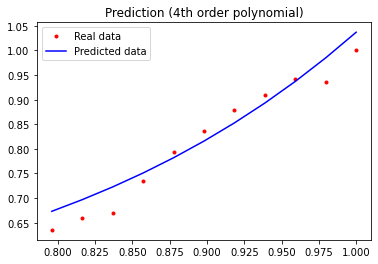

In [8]:
plt.plot(Year_test[:,0],CO2_test,'.', color = 'red', label = 'Real data')
plt.plot(Year_test[:,0],CO2_predict_test, color = 'blue', label = 'Predicted data')
plt.title('Prediction (4th order polynomial)')
plt.legend()
plt.show()

4th order polynomial best predicts the CO2 data from 2000 to 2010 

## Exercise 2 - Part 2

In [ ]:
Year_train = Year[0:38,0].reshape(-1,1)
CO2_train = CO2[0:38]
Year_test = Year[39:50,0].reshape(-1,1)
CO2_test = CO2[39:50]
model = Sequential()
model.add(Dense(32, input_dim=1, kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.add(Dense(units =1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mse'])
history = model.fit(Year_train, CO2_train, batch_size = 2, epochs = 200)
plt.plot(history.history['loss'])
CO2_predict_test = model.predict(Year_test)
CO2_predict_train = model.predict(Year_train)

2021-10-26 20:17:26.035840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-26 20:17:26.036048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-10-26 20:17:26.238065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-26 20:17:26.240897: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/200


In [ ]:
plt.plot(Year_test[:,0],CO2_test,'.', color = 'red', label = 'Real data')
plt.plot(Year_test[:,0],CO2_predict_test, color = 'blue', label = 'Predicted data')
print(mean_squared_error(CO2_test, CO2_predict_test))

Neural Network does not generalize the unseen data well from 2000 to 2010 despite tweaking several parameters

In [ ]:
model = Sequential()
Year_train, Year_test, CO2_train, CO2_test = train_test_split(Year, CO2, test_size = 0.2)
model.add(Dense(32, input_dim=1, kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.add(Dense(units =1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
history = model.fit(Year_train, CO2_train, batch_size = 2, epochs = 500)
plt.plot(history.history['loss'])
CO2_predict_test = model.predict(Year_test)

Neural Network behaves better when training and testing data selected randomly

In [ ]:
plt.plot(Year_test[:,0],CO2_predict_test)
plt.plot(Year_test[:,0],CO2_test,'.')
print(mean_squared_error(CO2_test, CO2_predict_test))